<a href="https://colab.research.google.com/github/tatwan/generative_ai_class/blob/main/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers langchain datasets accelerate sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.8 MB/s eta 0:00:00


## LangChain and HuggingFace

In [2]:
from langchain import HuggingFaceHub

In [3]:
import os

os.environ['HUGGINGFACEHUB_API_TOKEN'] = ''

llm = HuggingFaceHub(repo_id='facebook/bart-large-cnn')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:127: FutureWarning: '__init__' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)


In [4]:
llm

HuggingFaceHub(client=InferenceAPI(api_url='https://api-inference.huggingface.co/pipeline/summarization/facebook/bart-large-cnn', task='summarization', options={'wait_for_model': True, 'use_gpu': False}), repo_id='facebook/bart-large-cnn')

In [10]:
question = "Can Barack Obama have a conversation with George Washington?"

In [11]:
llm(question)

'Can Barack Obama have a conversation with George Washington? Obama says he\'s open to the idea. The White House says it would be a first step to having a conversation about the nation\'s first president. Obama: "I would be open to a conversation" about Washington\'s legacy.'

## Prompt Templates

In [6]:
from langchain import PromptTemplate

In [7]:
template = """
Question: {question}

Let's think step by step

Answer:
"""

In [8]:
prompt = PromptTemplate(template=template, input_variables=['question'])

In [9]:
prompt

PromptTemplate(input_variables=['question'], template="\nQuestion: {question}\n\nLet's think step by step\n\nAnswer:\n")

In [12]:
llm(prompt.format(question=question))

"Can Barack Obama have a conversation with George Washington? Let's think step by step and see how it works. Can President Obama talk to George Washington about the U.S. Constitution? Can Obama talk about the Constitution with Washington? Can the President talk to Washington about issues such as slavery and the Civil Rights movement?"

## LLMChain

In [13]:
from langchain import LLMChain

In [15]:
template = """Question: {question}

Let's think step by step.

Answer: """

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = LLMChain(prompt=prompt, llm=llm)

In [16]:
llm_chain.run(question)

"Can Biden have a conversation with George Washington? Let's think step by step. The answer is yes. The question is: Can he do it? The answer: Yes, he can. The next step is to find out if he can do it. That's the next step."

## LangChain and OpenAI

In [21]:
!pip install openai langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 3.4 MB/s eta 0:00:00


In [18]:
import pandas as pd

data = pd.read_csv('example_data.csv')

In [19]:
data

,id,text_column
0,1,The Eiffel Tower is located in Paris.
1,2,The Great Wall of China is one of the Seven Wo...
2,3,The Pacific Ocean is the largest ocean on Earth.
3,4,Shakespeare was a renowned English playwright ...
4,5,The theory of relativity was proposed by Alber...


In [22]:
from langchain import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType


In [23]:
openai_key = ''

In [24]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(openai_api_key=openai_key,  model="gpt-3.5-turbo-1106"),
    data,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [25]:
agent.run("how many rows are there?")

'There are 5 rows in the dataframe.'

In [26]:
agent.run("what was it about Shakespeare?")

'Shakespeare was a renowned English playwright and poet.'

In [27]:
agent.run("What is the summary of the content?")

'The summary of the text column content is as follows:\n- Count: 5\n- Mean length: 52.4\n- Standard deviation: 10.53\n- Minimum length: 37\n- 25th percentile: 48\n- Median length (50th percentile): 55\n- 75th percentile: 57\n- Maximum length: 65'

In [36]:
ts = pd.read_csv('milk_production.csv', index_col=['month'], parse_dates=True)
ts

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [37]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [38]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(openai_api_key=openai_key,  model="gpt-3.5-turbo-1106"),
    ts,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [39]:
agent.run("how many rows are there?")


'The dataframe contains 168 rows.'

In [41]:
agent.run("What type of data do we have? Is there an index")

'The "production" column contains integer data, and the "month" column is of type datetime. Additionally, there is a datetime index named "month". The index contains datetime values from January 1962 to December 1975.'

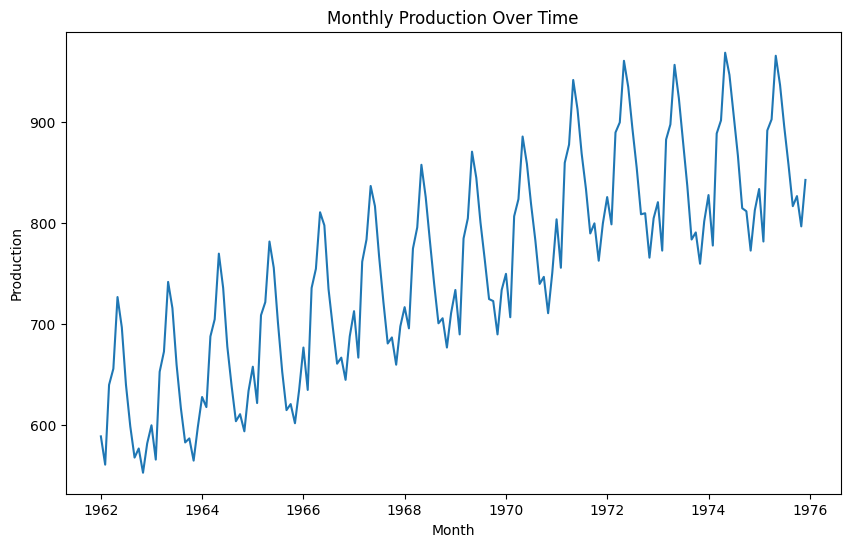

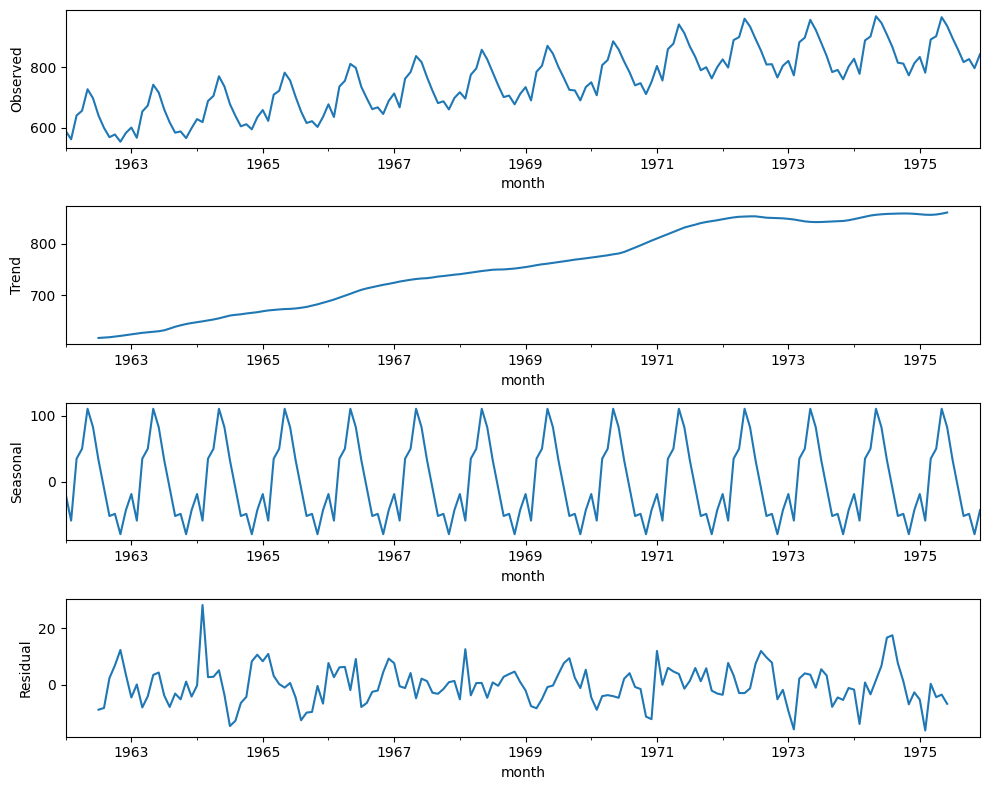

'Here is the seasonal decomposition plot of the production data. The plot consists of four subplots: observed, trend, seasonal, and residual components.\n\nBased on the plot:\n- The "observed" component shows the original production data.\n- The "trend" component indicates an increasing trend in production over time.\n- The "seasonal" component shows a repeating pattern that suggests the presence of seasonality.\n- The "residual" component represents the random fluctuations unexplained by the trend and seasonal components.\n\nThis analysis confirms the presence of both an increasing trend and a seasonal pattern in the production data.'

In [42]:
agent.run("For the time series data, are there any noticable trends or seasonalities?")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum 

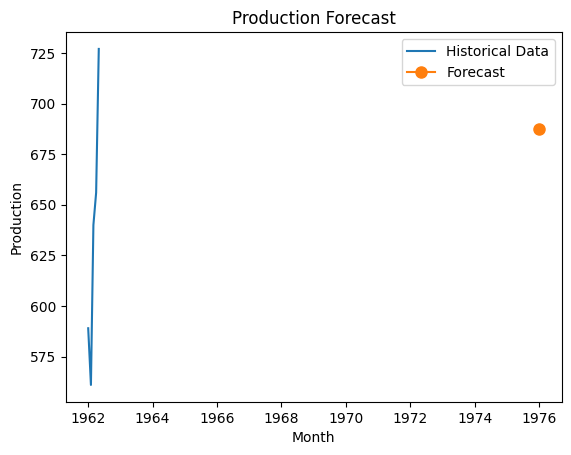

'Here is the time series plot for the production forecast, including the historical data and the forecast for the next month of 1976-01-01. The forecasted production value for that month is approximately 687.42.\n\nIf you have any further questions or need additional assistance, feel free to ask!'

In [45]:
agent.run("What is the forecast for production in the next month of 1976-01-01? Show me a time series plot")